In [86]:
import ast, secrets
import numpy as np
import random

In [6]:
master_cipher_collection = []

In [2]:
file = open("./Ciphertexts/ciphertexts_1.txt", 'r')

firstFileCipher = [line[:-1] for line in file.readlines()]

In [6]:
len(firstFileCipher)

4096

In [18]:
# import ast

for item in firstFileCipher:
    master_cipher_collection.append(ast.literal_eval(item))

In [22]:
len(master_cipher_collection)

4096

In [8]:
for i in range(1,4097):
    filename = "./Ciphertexts/ciphertexts_" + str(i) + ".txt"
    # print(filename)
    file = open(filename, 'r')
    # master_cipher_collection.append([ast.literal_eval(line[:-1]) for line in file.readlines()])
    for line in file.readlines():
        master_cipher_collection.append(ast.literal_eval(line[:-1]))
    file.close()

In [10]:
len(master_cipher_collection)

16777216

In [12]:
# master_cipher_collection

In [14]:
len(master_cipher_collection[0])

6

In [16]:
master_cipher_collection = np.array(master_cipher_collection)

In [17]:
master_cipher_collection.shape

(16777216, 6)

seed generation:

In [21]:
seed = secrets.token_bytes(5)
print(seed)

# Verify the length
if len(seed) == 5:
    print("The seed is 5 bytes long.")
else:
    print("The seed is not 5 bytes long.")

b'\x94*\xbepK'
The seed is 5 bytes long.


In [23]:
import os

seed = os.urandom(5)
print(seed)


b'\x17\xf6\x03\x11\xa7'


In [25]:
len(seed)

5

defining rc4:

In [28]:
n = 5
constant = 2**24
print(n, constant)

5 16777216


In [92]:
# S = []

def swap(S, i, j):
    temp = S[i]
    S[i] = S[j]
    S[j] = temp

def Key_Scheduling_Algorithim(seed):
    S = []
    for i in range(0,2**n):
        S.append(i)
    # print(S)
    j = 0
    l = 5   # len(seed)
    for i in range(0,2**n):
        j = (j + S[i] + seed[i%l]) % (2**n)
        swap(S, i, j)
    return S

def Pseudeo_Random_Generation(S, passcode_length):
    i = 0
    j = 0
    keystream = [0 for i in range(0,passcode_length)]   # defining a keystream list of length m

    for t in range(0,passcode_length):
        i = (i+1) % (2**n)
        j = (j + S[i]) % (2**n)
        swap(S, i, j)
        keystream[t] = S[(S[i] + S[j]) % (2**n)]

    return keystream
        
# S

In [44]:
# S = []
S = Key_Scheduling_Algorithim(seed)

In [46]:
print(S)

[23, 6, 2, 13, 3, 12, 10, 25, 9, 24, 21, 31, 1, 4, 15, 22, 18, 8, 7, 0, 28, 29, 30, 11, 5, 27, 17, 16, 14, 20, 19, 26]


In [48]:
Pseudeo_Random_Generation(S, 6)

[18, 31, 21, 2, 8, 16]

In [50]:
keystream = [0 for i in range(0,6)]

In [52]:
keystream

[0, 0, 0, 0, 0, 0]

In [102]:
# total_keystream_collection = []


def all_keystream_generation():
    total_keystream_collection = []
    m = 6  #hardcoding 6 bytes
    number_of_keys = 2**24

    for i in range(0,number_of_keys):
        seed = [random.randint(0, 2**5 - 1) for i in range(5)]
        Key_Scheduling_Algorithim(seed)
        keystream = Pseudeo_Random_Generation(S, m)
        total_keystream_collection.append(keystream)
    return total_keystream_collection

In [104]:
total_keystream_collection = all_keystream_generation()

In [106]:
len(total_keystream_collection)

16777216

In [108]:
# total_keystream_collection

In [110]:
keystream_dist = [[] for i in range(6)]

In [112]:
keystream_dist

[[], [], [], [], [], []]

In [114]:
for i in range(0,6):
    keystream_dist[i] = [0 for j in range(32)]

In [116]:
keystream

[0, 0, 0, 0, 0, 0]

In [118]:
import numpy as np
keystream_dist = [[0 for j in range(32)] for i in range(6)]
ksd_matrix = np.array(keystream_dist, dtype=float)
ksd_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [120]:
print(ksd_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [122]:
for i in range(6):
    for k in range(2**24):
        ksd_matrix[i][total_keystream_collection[k][i]] += 1
        keystream_dist[i][total_keystream_collection[k][i]] += 1

In [124]:
# ksd_matrix

In [126]:
# keystream_dist

In [128]:
constant

16777216

In [130]:
for i in range(6):
    for j in range(32):
        ksd_matrix[i][j] /= constant
        keystream_dist[i][j] /= constant

In [132]:
ksd_matrix

array([[0.03191406, 0.02381861, 0.03244287, 0.03212023, 0.03220111,
        0.03221875, 0.03123415, 0.03099561, 0.03080648, 0.0312162 ,
        0.03084677, 0.03108031, 0.03093076, 0.03137565, 0.03106147,
        0.03129125, 0.03182054, 0.03127664, 0.03110301, 0.03142095,
        0.03103721, 0.03133768, 0.03116763, 0.03131181, 0.03106016,
        0.03131586, 0.03108114, 0.03164673, 0.03156906, 0.03205031,
        0.03199691, 0.03325009],
       [0.06493628, 0.02953005, 0.02827525, 0.03011107, 0.03009075,
        0.03019452, 0.03007638, 0.03020799, 0.03022748, 0.0302164 ,
        0.03017145, 0.030213  , 0.03079367, 0.03033948, 0.03022391,
        0.0304361 , 0.03018808, 0.02916014, 0.03005707, 0.03029728,
        0.03009731, 0.03024775, 0.03019226, 0.03035218, 0.03033823,
        0.03043568, 0.03033841, 0.03033108, 0.03024817, 0.03040856,
        0.03085148, 0.03041255],
       [0.03106695, 0.03192508, 0.0309602 , 0.03181422, 0.03125352,
        0.03120935, 0.03117865, 0.03111714, 0.0311

In [134]:
# master_cipher_collection = np.array(master_cipher_collection)

In [136]:
cand_keystream = np.zeros((6,10,constant), dtype=int)

In [138]:
cand_keystream

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [140]:
master_cipher_collection.dtype

dtype('int64')

In [142]:
cand_keystream.dtype

dtype('int64')

In [144]:
master_cipher_collection.shape

(16777216, 6)

In [146]:
def _xor(a, b):
    return a^b

In [148]:
# first byte only:
for i in range(10):
    for j in range(constant):
        cand_keystream[0][i][j] = _xor((i+48), master_cipher_collection[j][0])

KeyboardInterrupt: 

In [150]:
cand_keystream = np.zeros((6,10,constant), dtype=int)

# an all bytes attempt:
for k in range(6):
    for i in range(10):
        for j in range(constant):
            cand_keystream[k][i][j] = _xor((i+48), master_cipher_collection[j][k])

In [152]:
cand_keystream[0]

array([[12, 24,  7, ..., 10, 26,  9],
       [13, 25,  6, ..., 11, 27,  8],
       [14, 26,  5, ...,  8, 24, 11],
       ...,
       [11, 31,  0, ..., 13, 29, 14],
       [ 4, 16, 15, ...,  2, 18,  1],
       [ 5, 17, 14, ...,  3, 19,  0]])

In [154]:
cand_keystream_distribution = np.zeros((6,10,32), dtype=float)

for i in range(6):
    for j in range(10):
        for t in range(constant):
            determinator_index = cand_keystream[i][j][t]
            cand_keystream_distribution[i][j][determinator_index] += 1
            # cand_keystream_distribution[i][j][determinator_index] /= constant

In [155]:
cand_keystream_distribution[1]

array([[ 504052.,  502431.,  502427.,  498250.,  499588.,  471113.,
         493152., 1046021.,  507886.,  505472.,  507168.,  523183.,
         506829.,  502860.,  503536.,  503810.,  514409.,  512012.,
         512999.,  508869.,  511224.,  509449.,  492223.,  508304.,
         518874.,  517253.,  517975.,  515835.,  515516.,  517884.,
         514545.,  512067.],
       [ 502431.,  504052.,  498250.,  502427.,  471113.,  499588.,
        1046021.,  493152.,  505472.,  507886.,  523183.,  507168.,
         502860.,  506829.,  503810.,  503536.,  512012.,  514409.,
         508869.,  512999.,  509449.,  511224.,  508304.,  492223.,
         517253.,  518874.,  515835.,  517975.,  517884.,  515516.,
         512067.,  514545.],
       [ 502427.,  498250.,  504052.,  502431.,  493152., 1046021.,
         499588.,  471113.,  507168.,  523183.,  507886.,  505472.,
         503536.,  503810.,  506829.,  502860.,  512999.,  508869.,
         514409.,  512012.,  492223.,  508304.,  511224., 

In [158]:
for i in range(6):
    for j in range(10):
        for t in range(32):
            # determinator_index = cand_keystream[i][j][t]
            # cand_keystream_distribution[i][j][determinator_index] += 1
            cand_keystream_distribution[i][j][t] /= constant

In [160]:
cand_keystream_distribution[1]

array([[0.03004384, 0.02994722, 0.02994698, 0.02969801, 0.02977777,
        0.02808052, 0.02939415, 0.06234771, 0.03027236, 0.03012848,
        0.03022957, 0.03118414, 0.03020936, 0.02997279, 0.03001308,
        0.03002942, 0.03066117, 0.03051829, 0.03057712, 0.03033096,
        0.03047132, 0.03036553, 0.02933878, 0.03029728, 0.0309273 ,
        0.03083068, 0.03087372, 0.03074616, 0.03072715, 0.03086829,
        0.03066927, 0.03052157],
       [0.02994722, 0.03004384, 0.02969801, 0.02994698, 0.02808052,
        0.02977777, 0.06234771, 0.02939415, 0.03012848, 0.03027236,
        0.03118414, 0.03022957, 0.02997279, 0.03020936, 0.03002942,
        0.03001308, 0.03051829, 0.03066117, 0.03033096, 0.03057712,
        0.03036553, 0.03047132, 0.03029728, 0.02933878, 0.03083068,
        0.0309273 , 0.03074616, 0.03087372, 0.03086829, 0.03072715,
        0.03052157, 0.03066927],
       [0.02994698, 0.02969801, 0.03004384, 0.02994722, 0.02939415,
        0.06234771, 0.02977777, 0.02808052, 0.0302

In [162]:
type(cand_keystream_distribution)

numpy.ndarray

In [164]:
type(keystream_dist)

list

In [166]:
keystream_dist = np.array(keystream_dist)

In [168]:
type(keystream_dist)

numpy.ndarray

In [170]:
keystream_dist.shape

(6, 32)

## first byte:

In [173]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[0] - cand_keystream_distribution[0][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [175]:
diffenece = np.array(diffenece)
diffenece

array([0.02069974, 0.02215815, 0.02011669, 0.02082419, 0.02169132,
       0.019961  , 0.02185988, 0.0220145 , 0.02171171, 0.02190804])

In [177]:
diffenece.argmin()

5

## second byte:

In [180]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[1] - cand_keystream_distribution[1][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [182]:
diffenece = np.array(diffenece)
diffenece

array([0.08232343, 0.08280957, 0.08162344, 0.0821048 , 0.07923424,
       0.0822252 , 0.08173776, 0.01035929, 0.08419108, 0.08462429])

In [184]:
diffenece.argmin()

7

## third byte:

In [187]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[2] - cand_keystream_distribution[2][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [189]:
diffenece = np.array(diffenece)
diffenece

array([0.00801289, 0.00785911, 0.008394  , 0.008214  , 0.00758457,
       0.00676048, 0.00773656, 0.00861263, 0.00719798, 0.00722122])

In [191]:
diffenece.argmin()

5

## fourth byte:

In [194]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[3] - cand_keystream_distribution[3][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [196]:
diffenece = np.array(diffenece)
diffenece

array([0.01002705, 0.00611639, 0.00977778, 0.0086422 , 0.00947392,
       0.00708413, 0.01180089, 0.00858009, 0.01082683, 0.01102209])

In [198]:
diffenece.argmin()

1

## fifth byte:

In [201]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[4] - cand_keystream_distribution[4][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [203]:
diffenece = np.array(diffenece)
diffenece

array([0.0076524 , 0.00937271, 0.01162696, 0.01102662, 0.00885296,
       0.00808418, 0.01094854, 0.01146638, 0.01037192, 0.01106513])

In [205]:
diffenece.argmin()

0

## sixth byte:

In [208]:
diffenece = []
for j in range(10):
    temp = np.abs(keystream_dist[5] - cand_keystream_distribution[5][j])
    # print(temp)
    net_sum = np.sum(temp)
    diffenece.append(net_sum)

In [210]:
diffenece = np.array(diffenece)
diffenece

array([0.00927162, 0.00898886, 0.00762403, 0.00656605, 0.00731063,
       0.00603306, 0.009884  , 0.00898111, 0.00942647, 0.00919175])

In [212]:
diffenece.argmin()

5

In [214]:
############

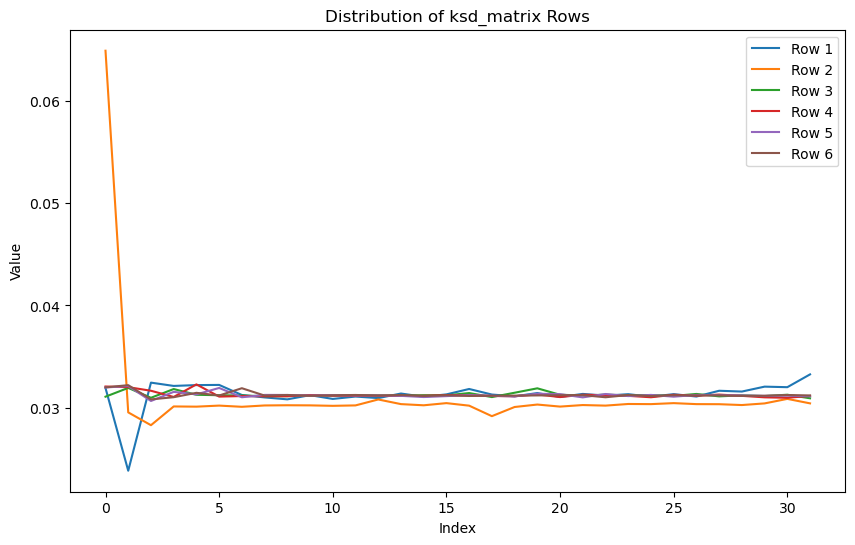

In [224]:
import matplotlib.pyplot as plt

# Plotting the line plot
plt.figure(figsize=(10, 6))
for i in range(ksd_matrix.shape[0]):
    plt.plot(ksd_matrix[i], label=f'Row {i + 1}')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Distribution of ksd_matrix Rows')
plt.legend()

# Save the plot as a PNG file
plt.savefig("ksd_matrix_line_plot.png", format='png', dpi=300)  # Adjust dpi for resolution
plt.show()
plt.close()  # Close the figure after saving

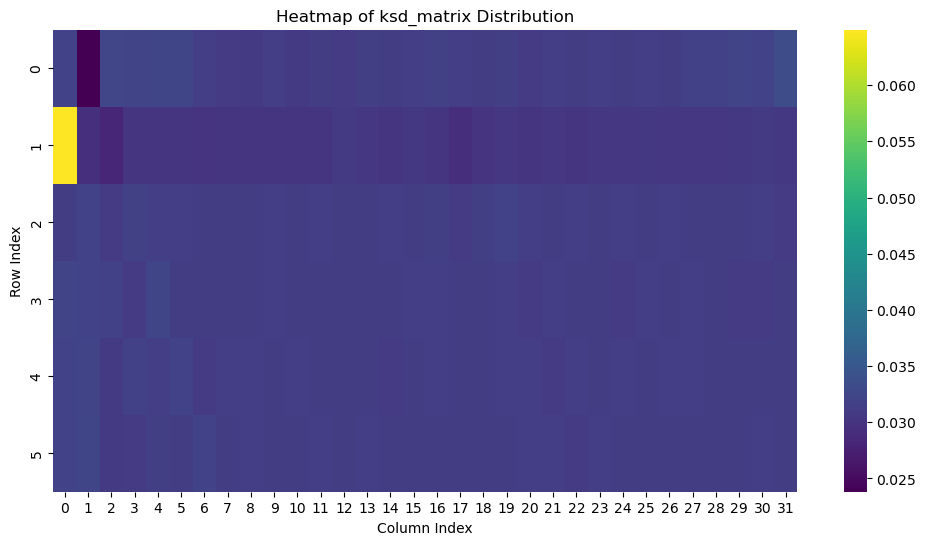

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ksd_matrix, cmap='viridis', annot=False)
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Heatmap of ksd_matrix Distribution')

# Save the plot as a PDF file
plt.savefig("ksd_matrix_heatmap.pdf", format='pdf', dpi=300)
plt.show()
plt.close()  # Close the figure after saving